In [15]:
import pandas as pd
import numpy as np
import gensim
import re
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from IPython.display import display, Markdown
import datasets


The data is separated by year. I will be starting from 2010 and I removed the unknown sub-folder within the data folder Each of the folders will be converted to dataframes that correspond to a specific year with rows that represent each of the files.

Each of the files in the folders will be first go through a content check (if the document is too short (empty) or too long (over 1000 lines) it will be discarded).

If the file passes the length check it will then be shortened to remove the header and have its contents added to the dataframe.

This dataframe will then be added to a dictionary that maps years to the corresponding dataframe. 

In [16]:
def remove_files(text):
    count = len(text.split(" "))
    if  count < 1000 or count > 100000:
        return True
    return False


In [17]:
def create_dictionary():
    dataset = datasets.load_dataset("siavava/ai-tech-articles")
    df = dataset["train"].to_pandas()  # there's only the 'train' split because HF requires it.

    # split df by year
    years = df["year"].unique()
    dfs = {}
    for year in sorted(years):
        year_df = df[df["year"] == year]
        year_df.apply(lambda row: np.nan if remove_files(row['text']) else row['text'], axis = 1)
        year_df = year_df.dropna(subset=['text'])
        year_df = year_df.sample(n=min(100, len(year_df)), random_state=5432534)
        dfs[year] = year_df 

    return dfs


In [18]:
year_dictionary = create_dictionary()


In [19]:
for year in year_dictionary:
    display(Markdown(f"### Year: {year}"))
    display(Markdown(f"Number of articles: {len(year_dictionary[year])}"))
    display(year_dictionary[year].head(3))
    display(Markdown("---"))


### Year: 2000

Number of articles: 31

,id,year,title,url,text
7383,7431,2000,"""How artificial intelligence could change rela...","""https://www.vox.com/the-highlight/23779098/re...","""We have a request Vox's journalism is free, b..."
7902,7950,2000,"""The Hot Seat | WIRED""","""https://www.wired.com/2000/07/chairs""","""Open Navigation Menu To revist this article, ..."
462,475,2000,"""Microsoft’s HoloLens 2: a $3500 mixed reality...","""https://www.theverge.com/2019/2/24/18235460/m...","""The Verge homepage The Verge homepage The Ver..."


---

### Year: 2001

Number of articles: 8

,id,year,title,url,text
6990,7038,2001,"""S | Keywords | The Guardian""","""https://www.theguardian.com/index/subjects/s""","""Account overview Billing Profile Emails & mar..."
11225,11291,2001,"""2001's 30-Year Odyssey | WIRED""","""https://www.wired.com//culture/lifestyle/news...","""Open Navigation Menu To revist this article, ..."
11831,11898,2001,"""Happy Birthday, Hal | WIRED""","""https://www.wired.com/1997/01/ffhal""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2002

Number of articles: 15

,id,year,title,url,text
11341,11407,2002,"""In Gold We Trust | WIRED""","""https://www.wired.com/wired/archive/10.01/ego...","""Open Navigation Menu To revist this article, ..."
7378,7426,2002,"""Vox Archives - Technology - Page 1""","""https://www.vox.com/technology/archives""","""Vox homepage Give Give Newsletters Newsletter..."
7389,7437,2002,"""Google - Vox""","""https://www.vox.com/google""","""Vox homepage Give Give Newsletters Newsletter..."


---

### Year: 2003

Number of articles: 1

,id,year,title,url,text
884,897,2003,"""Microsoft Sued for Weak Security | WIRED""","""https://www.wired.com/2003/10/microsoft-sued-...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2004

Number of articles: 9

,id,year,title,url,text
11782,11849,2004,"""The Long Tail | WIRED""","""https://www.wired.com/2004/10/tail""","""Open Navigation Menu To revist this article, ..."
408,421,2004,"""What is biohacking? The new “science” of opti...","""https://www.vox.com/future-perfect/2019/6/25/...","""We have a request Vox's journalism is free, b..."
13302,13369,2004,"""They've Got Your Number … | WIRED""","""https://www.wired.com/2004/12/phreakers""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2005

Number of articles: 5

,id,year,title,url,text
9268,9316,2005,"""Mind Control | WIRED""","""https://www.wired.com/2005/03/brain-3""","""Open Navigation Menu To revist this article, ..."
13209,13276,2005,"""The Hundred Dollar Man | MIT Technology Review""","""https://www.technologyreview.com/2005/10/13/2...","""Featured Topics Newsletters Events Podcasts F..."
1897,1910,2005,"""Implanting Hope | MIT Technology Review""","""https://www.technologyreview.com/s/403761/imp...","""Featured Topics Newsletters Events Podcasts F..."


---

### Year: 2006

Number of articles: 14

,id,year,title,url,text
12222,12289,2006,"""The Rise of Crowdsourcing | WIRED""","""https://www.wired.com/2006/06/crowds""","""Open Navigation Menu To revist this article, ..."
7684,7732,2006,"""David Cronenberg Is the Master of Grotesque S...","""https://www.wired.com/2023/11/geeks-guide-cro...","""Visually Open Nav.\nGo to Wired Home Page.\nD..."
11337,11403,2006,"""Confessions of a Cybermule | WIRED""","""https://www.wired.com/politics/onlinerights/n...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2007

Number of articles: 26

,id,year,title,url,text
11226,11292,2007,"""May 11, 1997: Machine Bests Man in Tournament...","""https://www.wired.com/science/discoveries/new...","""Open Navigation Menu To revist this article, ..."
8009,8057,2007,"""Software security co., Fortify, to buy Secure...","""https://venturebeat.com/2020/09/03/were-enter...","""Artificial Intelligence View All AI, ML and D..."
11832,11899,2007,"""A Decade After Kasparov's Defeat, Deep Blue C...","""https://www.wired.com/2007/05/a-decade-after-...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2008

Number of articles: 17

,id,year,title,url,text
13481,13548,2008,"""'Google-killer' Cuil's Market Share Not So Ho...","""https://www.wired.com/2008/09/google-killer-c""","""Open Navigation Menu To revist this article, ..."
13207,13274,2008,"""Watch Machine Learning: Living in the Age of ...","""https://www.wired.com/video/watch/machine-lea...","""Open Navigation Menu To revisit this article,..."
11262,11328,2008,"""The Untold Story: How the iPhone Blew Up the ...","""https://www.wired.com/2008/01/ff-iphone""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2009

Number of articles: 20

,id,year,title,url,text
1464,1477,2009,"""Secret Math of Fly Eyes Could Overhaul Robot ...","""https://www.wired.com/wiredscience/2009/11/fl...","""Open Navigation Menu To revist this article, ..."
10906,10971,2009,"""Stories From the Hunt | WIRED""","""https://www.wired.com/2009/11/stories-from-th...","""Open Navigation Menu To revist this article, ..."
416,429,2009,"""What is artificial intelligence? Your AI ques...","""https://www.vox.com/future-perfect/2018/12/21...","""Vox homepage Give Give Newsletters Newsletter..."


---

### Year: 2010

Number of articles: 31

,id,year,title,url,text
11153,11219,2010,"""The AI Revolution Is On | WIRED""","""https://www.wired.com/2010/12/ff-ai-essay-air...","""Open Navigation Menu To revist this article, ..."
11762,11829,2010,"""Clues Suggest Stuxnet Virus Was Built for Sub...","""https://www.wired.com/2010/11/stuxnet-clues""","""Open Navigation Menu To revist this article, ..."
9002,9050,2010,"""Ears Could Make Better Unique IDs Than Finger...","""https://www.wired.com/2010/11/ears-biometric-...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2011

Number of articles: 52

,id,year,title,url,text
838,851,2011,"""Accidental Scientist Hawks 'Online Marketplac...","""https://www.wired.com/2011/12/kaggle""","""Open Navigation Menu To revist this article, ..."
12913,12980,2011,"""10 disruptive cloud companies we're excited a...","""https://venturebeat.com/2011/11/28/10-up-and-...","""Artificial Intelligence View All AI, ML and D..."
11217,11283,2011,"""John McCarthy -- Father of AI and Lisp -- Die...","""https://www.wired.com/wiredenterprise/2011/10...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2012

Number of articles: 100

,id,year,title,url,text
12195,12262,2012,"""Mystery Google Device Appears in Small-Town I...","""https://www.wired.com/2012/09/pluto-switch""","""Open Navigation Menu To revist this article, ..."
11243,11309,2012,"""Mavericks Invent Future Internet Where Cisco ...","""https://www.wired.com/wiredenterprise/2012/04...","""Open Navigation Menu To revist this article, ..."
12193,12260,2012,"""Mavericks Invent Future Internet Where Cisco ...","""https://www.wired.com/2012/04/nicira""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2013

Number of articles: 100

,id,year,title,url,text
12253,12320,2013,"""Watch WIRED25: Sebastian Thrun & Sam Altman T...","""https://www.wired.com/video/watch/sebastian-t...","""Open Navigation Menu To revisit this article,..."
11864,11931,2013,"""Apple and Facebook Flash Forward to Computer ...","""https://www.wired.com/2013/03/flash-fusion-io...","""Open Navigation Menu To revist this article, ..."
11075,11141,2013,"""Out in the Open: The Free Tools That Let You ...","""https://www.wired.com/2013/10/tessel""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2014

Number of articles: 100

,id,year,title,url,text
6414,6427,2014,"""Wii U, Xbox One, & PS4 can't miss deals for C...","""https://venturebeat.com/games/wii-u-xbox-one-...","""Artificial Intelligence View All AI, ML and D..."
6490,6503,2014,"""Last chance on Shadow of Mordor's preorder de...","""https://venturebeat.com/games/last-chance-on-...","""Artificial Intelligence View All AI, ML and D..."
13192,13259,2014,"""Microsoft launches a machine learning service...","""https://venturebeat.com/2014/06/16/microsoft-...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2015

Number of articles: 100

,id,year,title,url,text
6050,6063,2015,"""You can now preorder Samsung's monitor with w...","""https://venturebeat.com/mobile/you-can-now-pr...","""Artificial Intelligence View All AI, ML and D..."
10836,10901,2015,"""I got a computer chip implanted into my hand....","""https://www.vox.com/2015/9/11/9307991/biohack...","""Vox homepage Give Give Newsletters Newsletter..."
10001,10057,2015,"""Review: Devialet Phantom | WIRED""","""https://www.wired.com/2015/06/review-devialet...","""Open Navigation Menu To revisit this article,..."


---

### Year: 2016

Number of articles: 100

,id,year,title,url,text
5730,5743,2016,"""3 corporate departments that chatbots will di...","""https://venturebeat.com/ai/3-corporate-depart...","""Artificial Intelligence View All AI, ML and D..."
5978,5991,2016,"""A cloning company wants to produce up to 1 mi...","""https://venturebeat.com/offbeat/a-cloning-com...","""Artificial Intelligence View All AI, ML and D..."
5768,5781,2016,"""NBC and Samsung to bring 85 hours of virtual ...","""https://venturebeat.com/mobile/nbc-and-samsun...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2017

Number of articles: 100

,id,year,title,url,text
10396,10452,2017,"""Indaba - Deep Learning Indaba 2023""","""https://deeplearningindaba.com""","""Indaba Organisers Affiliated Communities Spon..."
8959,9007,2017,"""Hackathon Track - Deep Learning Indaba 2019""","""https://deeplearningindaba.com/2019/indaba/ha...","""Indaba Code of Conduct Programme Keynote Spea..."
5969,5982,2017,"""10 predictions and opportunities for virtual ...","""https://venturebeat.com/arvr/10-predictions-a...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2018

Number of articles: 100

,id,year,title,url,text
17020,17087,2018,"""4 ways the AR cloud is connecting digital con...","""https://venturebeat.com/2018/08/31/4-ways-the...","""Artificial Intelligence View All AI, ML and D..."
4891,4904,2018,"""Overwatch League commissioner Nate Nanzer: Es...","""https://venturebeat.com/business/overwatch-le...","""Artificial Intelligence View All AI, ML and D..."
4821,4834,2018,"""Jam City lays off a number of game developers...","""https://venturebeat.com/business/jam-city-lay...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2019

Number of articles: 100

,id,year,title,url,text
12428,12495,2019,"""Rep. Tlaib v Detroit PD, round 2, was a misse...","""https://venturebeat.com/2019/10/04/rep-tlaib-...","""Artificial Intelligence View All AI, ML and D..."
12989,13056,2019,"""Microsoft launches AI Business School | Ventu...","""https://venturebeat.com/2019/03/11/microsoft-...","""Artificial Intelligence View All AI, ML and D..."
12522,12589,2019,"""Databricks launches AutoML Toolkit for model ...","""https://venturebeat.com/2019/08/20/databricks...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2020

Number of articles: 100

,id,year,title,url,text
8065,8113,2020,"""The Romanian Orphans Are Adults Now - The Atl...","""https://www.theatlantic.com/magazine/archive/...","""Site Navigation The Atlantic Popular Latest N..."
1513,1526,2020,"""A hybrid AI model lets it reason about the wo...","""https://www.technologyreview.com/2020/03/06/9...","""Featured Topics Newsletters Events Podcasts F..."
16045,16112,2020,"""Apple reports record $64.7 billion revenue in...","""https://venturebeat.com/2020/10/29/apple-repo...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2021

Number of articles: 100

,id,year,title,url,text
15260,15327,2021,"""Gartner prescribes a human-centric, hybrid-fo...","""https://venturebeat.com/2021/10/19/gartner-pr...","""Artificial Intelligence View All AI, ML and D..."
14177,14244,2021,"""AI-powered marketing copy generator Anyword s...","""https://venturebeat.com/uncategorized/ai-powe...","""Artificial Intelligence View All AI, ML and D..."
14468,14535,2021,"""Data labeling for AI research is highly incon...","""https://venturebeat.com/business/data-labelin...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2022

Number of articles: 100

,id,year,title,url,text
3422,3435,2022,"""Adapting industrial control system (ICS) secu...","""https://venturebeat.com/datadecisionmakers/ad...","""Artificial Intelligence View All AI, ML and D..."
3507,3520,2022,"""To build sustainable products, start in the d...","""https://venturebeat.com/data-infrastructure/t...","""Artificial Intelligence View All AI, ML and D..."
10600,10663,2022,"""Chess Is Just Poker Now - The Atlantic""","""https://www.theatlantic.com/technology/archiv...","""Site Navigation The Atlantic Popular Latest N..."


---

### Year: 2023

Number of articles: 100

,id,year,title,url,text
649,662,2023,"""Why Meta Is Breaking Its Own Walled Garden - ...","""https://www.theatlantic.com/technology/archiv...","""Site Navigation The Atlantic Popular Latest N..."
14995,15062,2023,"""As Russia's Cyberattacks on Ukraine Mount, th...","""https://www.cnet.com/tech/services-and-softwa...","""Black Friday 2023 Live Blog Can You Trust AI ..."
2658,2671,2023,"""Why generative AI is a game-changer for custo...","""https://venturebeat.com/ai/why-generative-ai-...","""Artificial Intelligence View All AI, ML and D..."


---

Now that we have the year dictionary we can begin the process of sentiment analysis.

The sentiment analysis model will return a sentiment number for each file. This number will then be averaged across all the files to get an average sentiment for the year.

From there we can do cosine similarity and plot sentiment for each year.

In [20]:
count = 0
def add_sentiment(dataframe):
    global count
    print(f"{count:5d}: Adding sentiment to {len(dataframe)} articles")
    count += 1
    
    sentiment_model = SentimentIntensityAnalyzer()
    neg_list = []
    neu_list = []
    pos_list = []
    comp_list = []
    
    # pick random subset of 100 articles from df


    for text in dataframe['text']:
        score_dict = sentiment_model.polarity_scores(text)
        neg_list.append(score_dict['neg'])
        neu_list.append(score_dict['neu'])
        pos_list.append(score_dict['pos'])
        comp_list.append(score_dict['compound'])
    
    dataframe['negative'] = neg_list
    dataframe['neutral'] =  neu_list
    dataframe['positive'] = pos_list
    dataframe['compound'] = comp_list


In [21]:
# text = ["CS89 is an amazing class!"]

# df = pd.DataFrame({'Text': text})

# add_sentiment(df)
# display(df)


In [22]:
for df in year_dictionary.values():
    add_sentiment(df)


    0: Adding sentiment to 31 articles
    1: Adding sentiment to 8 articles
    2: Adding sentiment to 15 articles
    3: Adding sentiment to 1 articles
    4: Adding sentiment to 9 articles
    5: Adding sentiment to 5 articles
    6: Adding sentiment to 14 articles
    7: Adding sentiment to 26 articles
    8: Adding sentiment to 17 articles
    9: Adding sentiment to 20 articles
   10: Adding sentiment to 31 articles
   11: Adding sentiment to 52 articles
   12: Adding sentiment to 100 articles
   13: Adding sentiment to 100 articles
   14: Adding sentiment to 100 articles
   15: Adding sentiment to 100 articles
   16: Adding sentiment to 100 articles
   17: Adding sentiment to 100 articles
   18: Adding sentiment to 100 articles
   19: Adding sentiment to 100 articles
   20: Adding sentiment to 100 articles
   21: Adding sentiment to 100 articles
   22: Adding sentiment to 100 articles
   23: Adding sentiment to 100 articles


In [23]:
def get_sentiment(df, sentiment_type):
    return np.mean(df[sentiment_type])


In [24]:
def get_sentiment_data(year_dict):
    
    sentiment_types = ['negative', 'neutral', 'positive', 'compound']
    sentiment_df = pd.DataFrame(columns=['year', 'negative', 'neutral', 'positive', 'compound'])
    index = 0

    for year, df in year_dict.items():
        data_list = [int(year)]

        for s_type in sentiment_types:
            data_list.append(get_sentiment(df,s_type))
            
        sentiment_df.loc[index] = data_list
        index = index + 1

    sentiment_df.head(5)
    return sentiment_df


In [25]:
sentiment_data_df = get_sentiment_data(year_dictionary)
display(sentiment_data_df)


,year,negative,neutral,positive,compound
0,2000.0,0.044774,0.823226,0.131452,0.999626
1,2001.0,0.054500,0.828250,0.117250,0.749287
2,2002.0,0.054200,0.840467,0.105267,0.995560
3,2003.0,0.078000,0.807000,0.115000,0.982700
4,2004.0,0.057778,0.834667,0.107778,0.999022
5,2005.0,0.051200,0.841600,0.107200,0.999560
6,2006.0,0.069714,0.827214,0.103071,0.566200
7,2007.0,0.044423,0.828423,0.127077,0.760212
8,2008.0,0.049412,0.834353,0.116294,0.756047
9,2009.0,0.060550,0.829700,0.110000,0.608870


Plot the data with years on the x-axis and the sentiment types in different colors.

In [26]:
def plot_sentiment(df, title):
    sentiment_types = ['negative', 'neutral', 'positive', 'compound']
    colors_list = ['red', 'blue', 'gold', 'black'] 
    color_choice = 0

    for sentiment_type in sentiment_types:
        plt.plot(df['year'], df[sentiment_type], "o--", label=sentiment_type, color=colors_list[color_choice])
        color_choice = color_choice + 1

    plt.legend()
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Sentiment Score')
    plt.show()


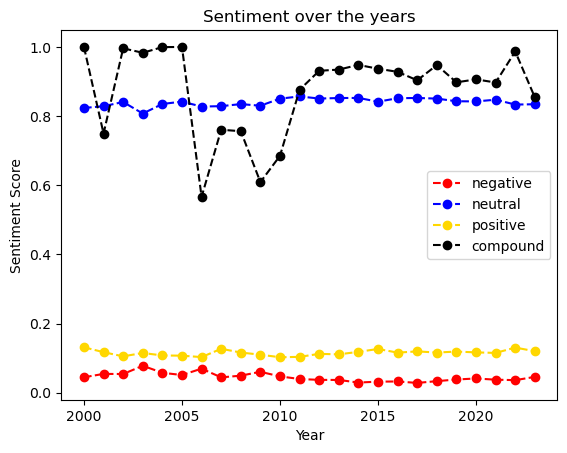

In [27]:
plot_sentiment(sentiment_data_df, "Sentiment over the years")


We can also perform topic modeling on the data. We can then analyze the sentiment within the context of the specific topic. 

I will be using the title column for each file to get an idea of the topic for A.I. Since we are only using the titles, I believe that utilizing LDA topic modeling should be sufficient. 


In [28]:
def get_titles(dictionary):

    all_titles = []

    for df in dictionary.values():
        titles = df['title'].to_list()
        all_titles.append(titles)

    return all_titles


In [29]:
#year_dictionary[2001]


In [30]:
titles = get_titles(year_dictionary)


In [31]:
def lemmatize(text):
    
    lemmer = WordNetLemmatizer()
    pos_set = set(['n', 'a', 'v'])

    lemmatized_text = [lemmer.lemmatize(tok, pos='n') if pos[0].lower() in pos_set else lemmer.lemmatize(tok) 
                        for sent in text for tok, pos in pos_tag(sent, tagset='universal')]
    
    return lemmatized_text


In [32]:
def process_text(text):
    text = lemmatize(text)
    vect = CountVectorizer(stop_words='english')
    features = vect.fit_transform(text)

    return features


In [37]:
import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('universal_tagset')
# nltk.download('wordnet')
processed_titles = process_text(titles)


In [38]:
def get_add_topics(features, dictionary):
    topic_dict ={}
    
    lda_model = LatentDirichletAllocation(n_components=5, learning_method='online',random_state=42).fit(features)

    topic_num = 0
    for words in lda_model.components_:
        topic_dict[topic_num] = words.argsort()[:-10 - 1:-1]
        topic_num = topic_num + 1

    topics = lda_model.transform(features)
    topics.shape

    topic_index = -1
    for df in dictionary.values():
        # print(len(df))
        title_topic = [topics[topic_index+i].argmax() for i in range(1,len(df)+1)]
        df['topic'] = title_topic
        topic_index = topic_index + len(df)

    return topic_dict


In [39]:
topics = get_add_topics(processed_titles, year_dictionary)


In [ ]:
#print(year_dictionary[2023]['topic'].values)


Now we can create dataframes grouped by topic and map the sentiment.

In [40]:
def create_topics_dict(dictionary):
    
    new_dict = {}
    
    for topic_num in range(5):
        topic_df = pd.DataFrame()

        for df in dictionary.values():
            temp_df = df[df['topic'] == 0]
            topic_df = pd.concat([topic_df, temp_df])
        
        new_dict[topic_num] = topic_df
    
    return new_dict


In [41]:
topic_dictionary = create_topics_dict(year_dictionary)


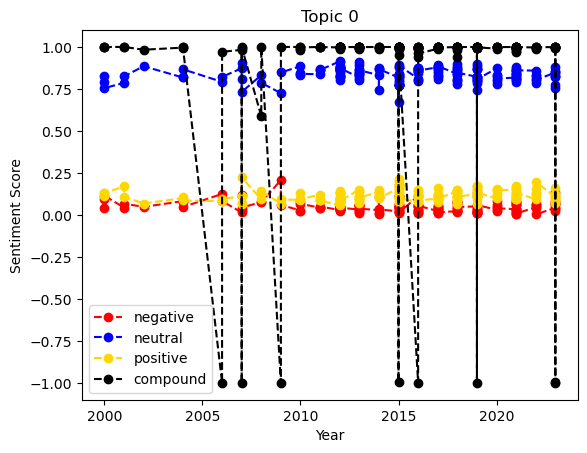

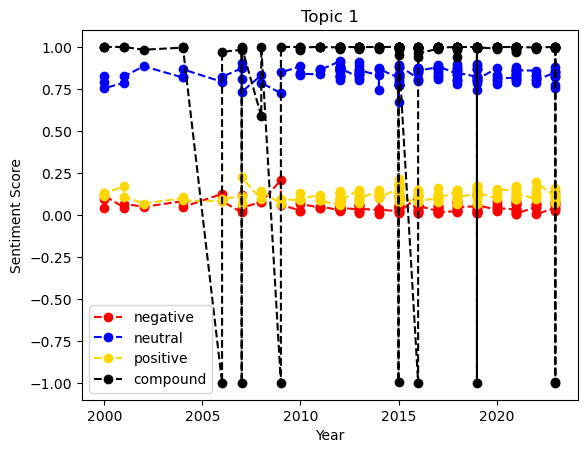

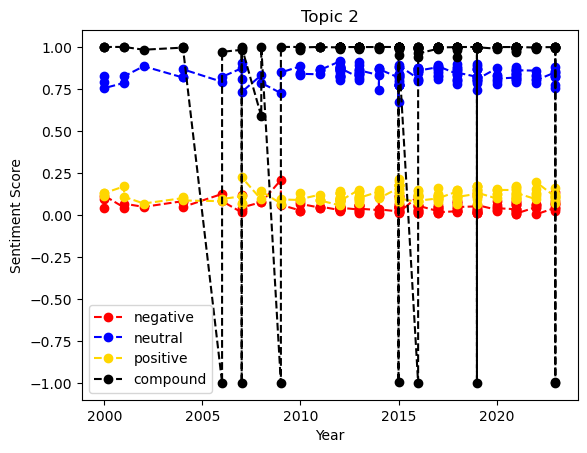

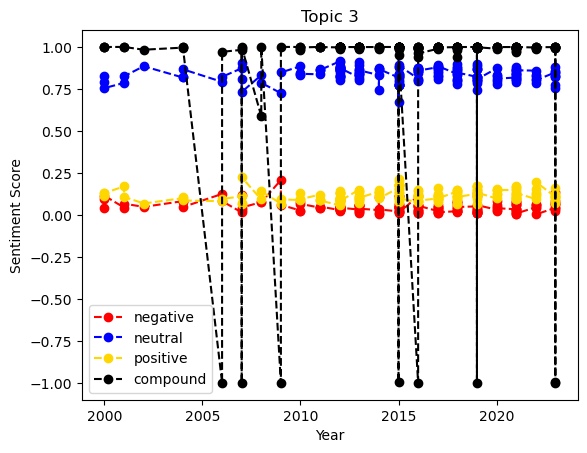

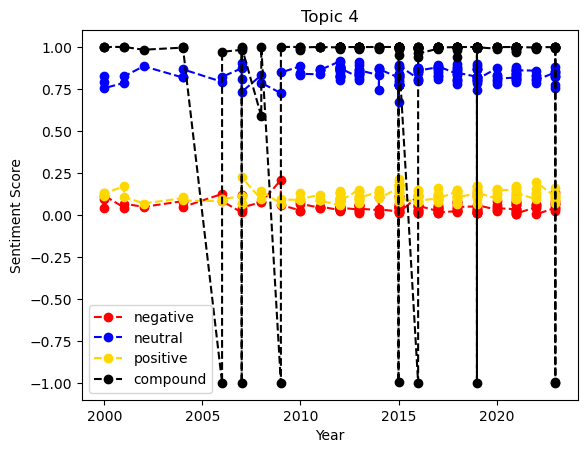

In [42]:
for topic_num, df in sorted(topic_dictionary.items()):
    title = f'Topic {topic_num}'
    plot_sentiment(df, title)
